In [3]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
import matplotlib
import pandas as pd
import numpy as np

for font in font_manager.findSystemFonts('/Users/leonardokuffo/Library/Fonts/'):
    font_manager.fontManager.addfont(font)

matplotlib.font_manager.findSystemFonts(fontpaths=None, fontext='ttf')
matplotlib.rc('font', family='Droid Serif') 

In [4]:
DATASETS_MAPPING = {
    'nytimes-16-angular': 'NYTimes/16',
    'glove-50-angular': 'GloVe/50',
    'deep-image-96-angular': 'DEEP/96',
    'sift-128-euclidean': 'SIFT/128',
    'glove-200-angular': 'GloVe/200',
    'msong-420': 'MSong/420',
    # 'har-561': 'HAR/561',
    'contriever-768': 'Contriever/768',
    'instructorxl-arxiv-768': 'arXiv/768',
    #'fashion-mnist-784-euclidean': 'F-MNIST/784',
    'gist-960-euclidean': 'GIST/960',
    'openai-1536-angular': 'OpenAI/1536'
}
arch = 'SAPPHIRE'
#arch = 'ZEN4_INSITU'
#arch = 'ZEN4_AWS'
#arch = 'GRAVITON4'
#arch = 'ZEN3'

In [5]:
pdx_bond = pd.read_csv(f'../{arch}/EXACT_PDX_BOND.csv', index_col=False)
pdx_bond = pdx_bond[pdx_bond['algorithm'] == 'pdx-bond-dtm']
pdx_bond_dec = pd.read_csv(f'../{arch}/EXACT_PDX_BOND.csv', index_col=False)
pdx_bond_dec = pdx_bond_dec[pdx_bond_dec['algorithm'] == 'pdx-bond-dec']
pdx_bond_sec = pd.read_csv(f'../{arch}/EXACT_PDX_BOND.csv', index_col=False)
pdx_bond_sec = pdx_bond_sec[pdx_bond_sec['algorithm'] == 'pdx-bond-sec']
pdx = pd.read_csv(f'../{arch}/EXACT_PDX.csv', index_col=False)
usearch = pd.read_csv(f'../{arch}/EXACT_USEARCH.csv', index_col=False)
faiss = pd.read_csv(f'../{arch}/EXACT_FAISS.csv', index_col=False)
milvus = pd.read_csv(f'../{arch}/EXACT_MILVUS.csv', index_col=False)
sklearn = pd.read_csv(f'../{arch}/EXACT_SKLEARN.csv', index_col=False)
dsm = pd.read_csv(f'../{arch}/EXACT_DSM.csv', index_col=False)

In [6]:
pdx_bond['algorithm'] = 'PDX-BOND'
pdx_bond_dec['algorithm'] = 'PDX-BOND (Dec)'
pdx_bond_sec['algorithm'] = 'PDX-BOND (Sec)'
pdx['algorithm'] = 'PDX-LINEAR-SCAN'
dsm['algorithm'] = 'DSM-LINEAR-SCAN'
usearch['algorithm'] = 'USEARCH'
faiss['algorithm'] = 'FAISS'
milvus['algorithm'] = 'MILVUS'
sklearn['algorithm'] = 'SCIKIT-LEARN'

In [7]:
df = pd.concat([
    pdx_bond,
    pdx_bond_dec,
    pdx_bond_sec,
    pdx,
    faiss,
    usearch,
    milvus,
    sklearn,
    dsm
], ignore_index=True)
df['avg'] = 1000 / df['avg']
df = df[df['dataset'].isin(list(DATASETS_MAPPING.keys()))]
df = df[['algorithm', 'dataset', 'recall', 'avg']]
df.columns =  ['Algorithm', 'Dataset', 'Recall', 'QPS']
df['Dataset'] = df['Dataset'].apply(lambda x: DATASETS_MAPPING[x])

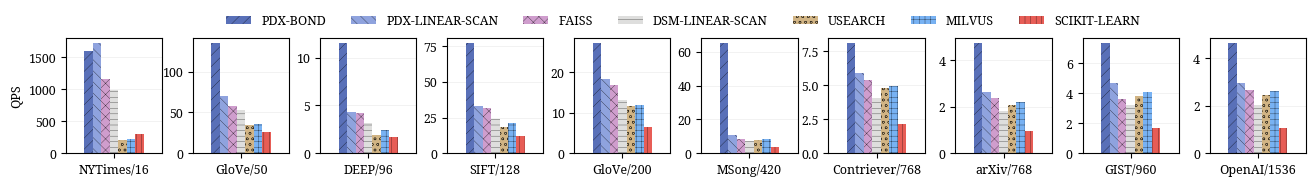

In [16]:
fig, (
    ax1, ax2, ax3, ax4, ax5, ax6, ax9, ax10, ax11, ax12
) = plt.subplots(1, 10)
fig.set_size_inches(16, 1.5)
plots = [ax1, ax2, ax3, ax4, ax5, ax6, ax9, ax10, ax11, ax12]

plt.subplots_adjust(hspace=0.10, wspace=0.32)

matplotlib.rcParams['hatch.linewidth'] = 0.2

algorithms = [
    'PDX-BOND',
    # 'PDX-BOND (Dec)',
    # 'PDX-BOND (Sec)',
    'PDX-LINEAR-SCAN',
    'FAISS', 
    'DSM-LINEAR-SCAN',
    'USEARCH',	
    'MILVUS', 
    'SCIKIT-LEARN',
]

colors = {
    'PDX-BOND': '#5970B8',
    'PDX-LINEAR-SCAN': '#90a4de',
    'FAISS': '#cf9dcd',
    'DSM-LINEAR-SCAN': '#dedede',
    'USEARCH': '#d1b484',
    'MILVUS': '#77b3f5',
    'SCIKIT-LEARN': '#e75d56',
}

cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", list(colors.values()))
patterns =('///', '\\\\\\', 'xxx', '---', 'ooo', '+++', '|||', '***', '---')


for i, dataset in enumerate(DATASETS_MAPPING.keys()):
    dataset_name = DATASETS_MAPPING[dataset]
    ax = plots[i]
    tmp = df[df['Dataset'] == dataset_name][['Algorithm', 'Dataset', 'QPS']]
    tmp = tmp.pivot(index="Dataset", columns="Algorithm").droplevel(0, axis='columns').reset_index()

    tmp.plot.bar(
        x='Dataset',
        y=algorithms,
        ax=ax,
        colormap=cmap,
        width=0.8
    )
    ax.tick_params(axis='x', labelrotation=0, labelsize=9)
    ax.set_xlabel("")
    ax.set_ylabel("QPS", fontsize=9)
    ax.tick_params(axis='y', labelrotation=0, labelsize=9)
    #ax.set_yscale('log')
    
    ax.yaxis.grid(linewidth=0.5, color='#ededed')
    ax.set_axisbelow(True)

    bars = ax.patches
    for j in range(len(algorithms)):
        bars[j].set_hatch(patterns[j])

    ax.legend(
        labels=algorithms,
        loc="upper left",
        prop={'size': 9},
        ncols=len(algorithms),
        frameon=False,
        bbox_to_anchor=(1.55,1.3),
        markerscale=1.3
    )

    ax.set_ylim(0, ax.get_ylim()[1])

    if i != 0:
        ax.legend().remove()
    if i != 0:
        ax.set_ylabel('')

plt.savefig(f'../figures/EXACT_{arch}_tmp.png', bbox_inches='tight', dpi=600)

In [18]:
tmp_spd = df[['Algorithm', 'Dataset', 'QPS']].pivot(index="Dataset", columns="Algorithm").droplevel(0, axis='columns').reset_index()
tmp_spd['Speedup_Usearch'] = tmp_spd['PDX-BOND'] / tmp_spd['USEARCH']
tmp_spd['Speedup_Milvus'] = tmp_spd['PDX-BOND'] / tmp_spd['MILVUS']
tmp_spd['Speedup_FAISS'] = tmp_spd['PDX-BOND'] / tmp_spd['FAISS']
tmp_spd['Speedup_PDX'] = tmp_spd['PDX-LINEAR-SCAN'] / tmp_spd['SCIKIT-LEARN']
tmp_spd['Speedup_PDX_FAISS'] = tmp_spd['PDX-LINEAR-SCAN'] / tmp_spd['FAISS']
tmp_spd['Speedup_SKL'] = tmp_spd['PDX-BOND'] / tmp_spd['SCIKIT-LEARN']
tmp_spd['Speedup_DTM_VS_DEC'] = tmp_spd['PDX-BOND'] / tmp_spd['PDX-BOND (Dec)']
tmp_spd['Speedup_PDX_DSM'] = tmp_spd['PDX-LINEAR-SCAN'] / tmp_spd['DSM-LINEAR-SCAN']

print('Results for', arch)
print('Average Speedup of PDX BOND against Usearch:', tmp_spd['Speedup_Usearch'].mean())
print('Average Speedup of PDX BOND against Milvus:', tmp_spd['Speedup_Milvus'].mean())
print('Average Speedup of PDX BOND against FAISS:', tmp_spd['Speedup_FAISS'].mean())
print('Average Speedup of PDX-Linear-Scan against Scikit Learn:', tmp_spd['Speedup_PDX'].mean())
print('Average Speedup of PDX-Linear-Scan against FAISS:', tmp_spd['Speedup_PDX_FAISS'].mean())
print('Average Speedup of PDX BOND against Scikit Learn:', tmp_spd['Speedup_SKL'].mean())
print('Average Speedup of DTM against DEC:', tmp_spd['Speedup_DTM_VS_DEC'].mean())
print('Average Speedup of PDX-Linear-Scan against DSM:', tmp_spd['Speedup_PDX_DSM'].mean())

tmp_spd[['Dataset', 'Speedup_Usearch', 'Speedup_Milvus', 'Speedup_FAISS', 'Speedup_SKL', 'Speedup_PDX_FAISS', 'Speedup_PDX_DSM']]

Results for SAPPHIRE
Average Speedup of PDX BOND against Usearch: 4.0138867182763525
Average Speedup of PDX BOND against Milvus: 3.6878304623500258
Average Speedup of PDX BOND against FAISS: 2.5299081460366315
Average Speedup of PDX-Linear-Scan against Scikit Learn: 3.061224236898215
Average Speedup of PDX-Linear-Scan against FAISS: 1.171919147418579
Average Speedup of PDX BOND against Scikit Learn: 6.22147977815283
Average Speedup of DTM against DEC: 1.364855583145894
Average Speedup of PDX-Linear-Scan against DSM: 1.4461882082075734


Algorithm,Dataset,Speedup_Usearch,Speedup_Milvus,Speedup_FAISS,Speedup_SKL,Speedup_PDX_FAISS,Speedup_PDX_DSM
0,Contriever/768,1.681623,1.634933,1.508584,3.817633,1.106162,1.449342
1,DEEP/96,5.931195,4.824712,2.711067,6.960852,1.027340,1.386776
2,GIST/960,1.911436,1.809377,2.030784,4.361534,1.302881,1.450092
3,GloVe/200,2.335939,2.291839,1.599536,4.144529,1.076065,1.399244
4,GloVe/50,3.932561,3.788964,2.319857,5.164481,1.212930,1.329052
5,MSong/420,8.401190,7.888415,7.622960,16.697686,1.274141,1.445174
6,NYTimes/16,7.589879,7.095845,1.376688,5.452722,1.473760,1.742416
7,OpenAI/1536,1.900725,1.778960,1.732131,4.386157,1.107650,1.460976
8,SIFT/128,4.170897,3.616662,2.410827,6.192648,1.036574,1.364242
9,arXiv/768,2.283424,2.148597,1.986648,5.036556,1.101690,1.434568
